## TESS Light Curve Filtering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import pickle
from astropy.io import fits
from astropy.wcs import WCS   

Every lightcurve (not only TESS) will include instrumental and astrophysical signals, with the addition of atmospheric effects (seeing variations and changes in the sky's transparency...) if observations are carried out from the ground.
In the case of TASTE data, instrumental signatures and atmospheric effects are removed through differential photometry. Stellar signals are still present, but rotational variability can be modelled as a linear or quadratic trend during the short duration of a transit, while short-term variabilities such as granulation and oscillations would more sophisticated techniques.

TESS data, on the other hand, still contains both instrumental and astrophysical signatures (in the case of SAP data) or just astrophysical ones (in the case of PDCSAP). When several weeks of continuous observations are available, several approaches can be implemented:
- Selection of each transit and independent modelling of the out-transit part around each transit.
- Modelling of the astrophysical noise through a physically-justified model.
- Empirical removal of the instrumental and astrophysical signals, regardless of their origins, through an automatic filtering algorithm.

The first solution becomes impractical quickly as each sector may contain many transits, and the target may have been observed for several sectors. The second solution requires a deep knowledge of the most advanced statistical tools to deal with correlated noise, which is beyond the scope of this course. Fortunately for us, the third approach is already implemented in a package called wotan.

In [2]:
# wotan github (pip install wotan)

from wotan import flatten

We need to import the TESS data we have to flatten. 

In [3]:
sector80_dictionary = pickle.load(open('WASP135_TESS_sector80_selected.p', 'rb'))

sector79_dictionary = pickle.load(open('WASP135_TESS_sector79_selected.p', 'rb'))

sector53_dictionary = pickle.load(open('WASP135_TESS_sector53_selected.p', 'rb'))

In [4]:
print(sector80_dictionary.keys())
print(sector79_dictionary.keys())
print(sector53_dictionary.keys())

dict_keys(['time', 'sap_flux', 'sap_flux_error', 'pdcsap_flux', 'pdcsap_flux_error'])
dict_keys(['time', 'sap_flux', 'sap_flux_error', 'pdcsap_flux', 'pdcsap_flux_error'])
dict_keys(['time', 'sap_flux', 'sap_flux_error', 'pdcsap_flux', 'pdcsap_flux_error'])


In [5]:
time_80 = sector80_dictionary['time']
sap_flux_80 = sector80_dictionary['sap_flux']
sap_flux_error_80 = sector80_dictionary['sap_flux_error']
pdcsap_flux_80 = sector80_dictionary['pdcsap_flux']
pdcsap_flux_error_80 = sector80_dictionary['pdcsap_flux_error']

time_79 = sector79_dictionary['time']
sap_flux_79 = sector79_dictionary['sap_flux']
sap_flux_error_79 = sector79_dictionary['sap_flux_error']
pdcsap_flux_79 = sector79_dictionary['pdcsap_flux']
pdcsap_flux_error_79 = sector79_dictionary['pdcsap_flux_error']

time_53 = sector53_dictionary['time']
sap_flux_53 = sector53_dictionary['sap_flux']
sap_flux_error_53 = sector53_dictionary['sap_flux_error']
pdcsap_flux_53 = sector53_dictionary['pdcsap_flux']
pdcsap_flux_error_53 = sector53_dictionary['pdcsap_flux_error']

From the TESS ExoFOP website, we retrieve the orbital period, the central time of transit, and the transit duration (converted in days) of our planet. Use the Period and Transit time (denoted as Epoch in the ExoFOP table) coming from the TOIs (TESS Project) table. Values obtained several years earlier from ground-based photometry may carry an error that will result in a shift of the position of the transit when propagated to the epoch of the TESS observations.

We also need the transit duration, we will use this value to select observations taken during the transit and exclude them from the filtering process. To ensure that all the in-transit points are excluded, you can enlarge the transit window by twice the value of the transit duration reported in ExoFOP. Remember to convert the value from hours to days.

In [6]:
# Dal sito ExoFOP

transit_time = 2459768.65359
period = 1.4013784006976
transit_duration = 1.7042714748865 / 24 # <-- è in ore

In [7]:
# se non funziona prova ad aumentare window_lenght a 1
# pip install -- user scikit-learn
sap_flatten_flux_80, sap_flatten_model_80 = flatten(time_80,          # Array of time values
                                            sap_flux_80,              # Array of flux values
                                            method='hspline', 
                                            window_length=0.5,        # The knot distance in units of ``time``
                                            break_tolerance=0.5,      # Split into segments at breaks longer than that
                                            return_trend= True)        # Return trend and flattened light curve

sap_flatten_flux_79, sap_flatten_model_79 = flatten(time_79, sap_flux_79, method='hspline', window_length=0.5, break_tolerance=0.5, return_trend= True) 

sap_flatten_flux_53, sap_flatten_model_53 = flatten(time_53, sap_flux_53, method='hspline', window_length=0.6, break_tolerance=0.5, return_trend= True) 


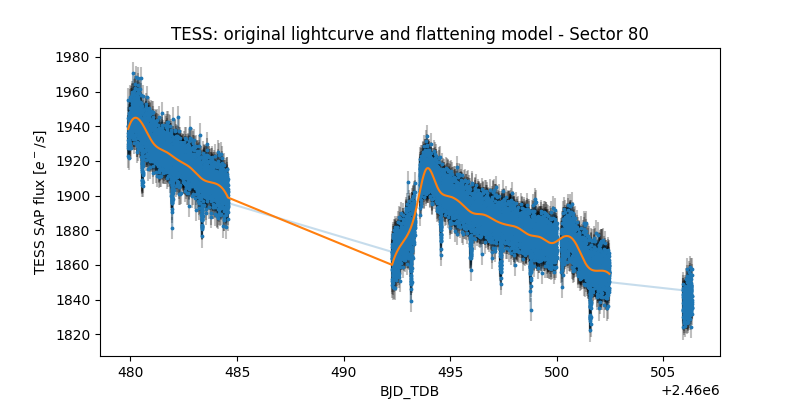

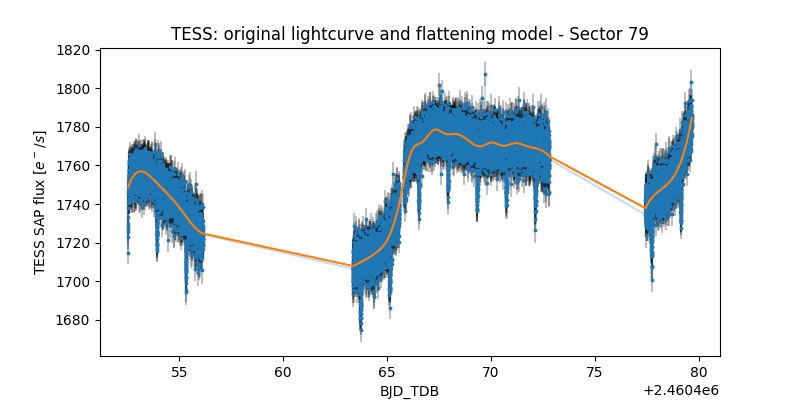

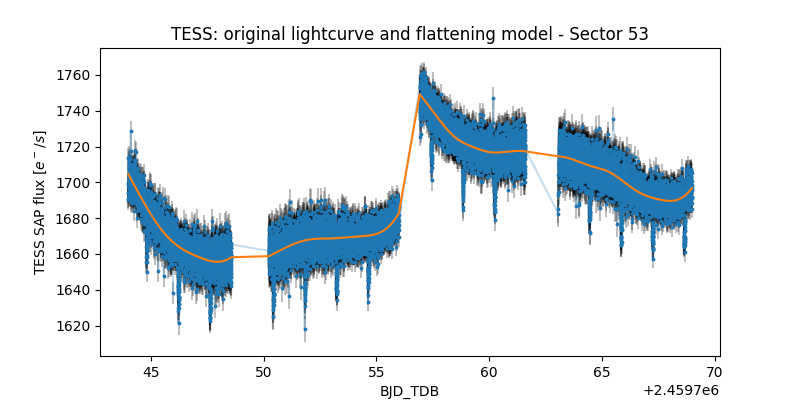

In [8]:
plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model - Sector 80')
plt.scatter(time_80, sap_flux_80, c='C0', s=3)
plt.errorbar(time_80, sap_flux_80, yerr=sap_flux_error_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_80, sap_flatten_model_80, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.show()

plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model - Sector 79')
plt.scatter(time_79, sap_flux_79, c='C0', s=3)
plt.errorbar(time_79, sap_flux_79, yerr=sap_flux_error_79, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_79, sap_flatten_model_79, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.show()

plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model - Sector 53')
plt.scatter(time_53, sap_flux_53, c='C0', s=3)
plt.errorbar(time_53, sap_flux_53, yerr=sap_flux_error_53, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_53, sap_flatten_model_53, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.show()

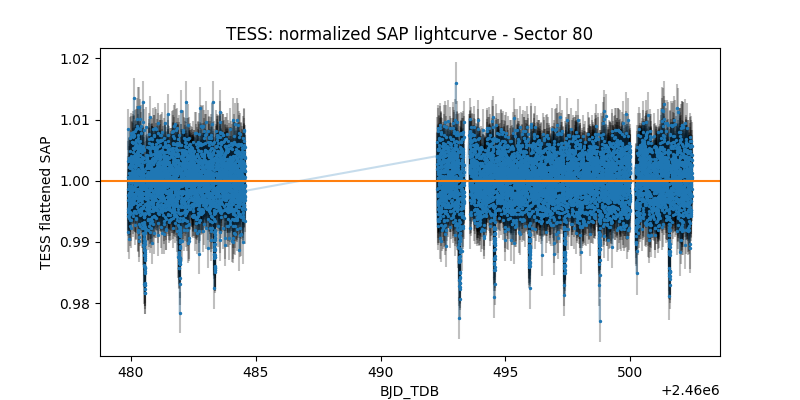

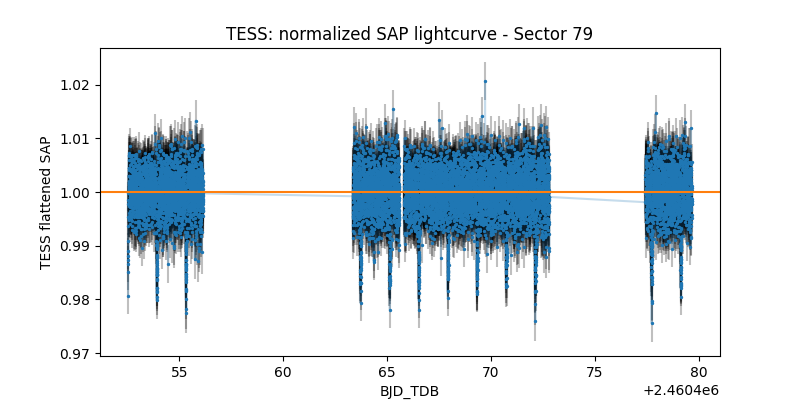

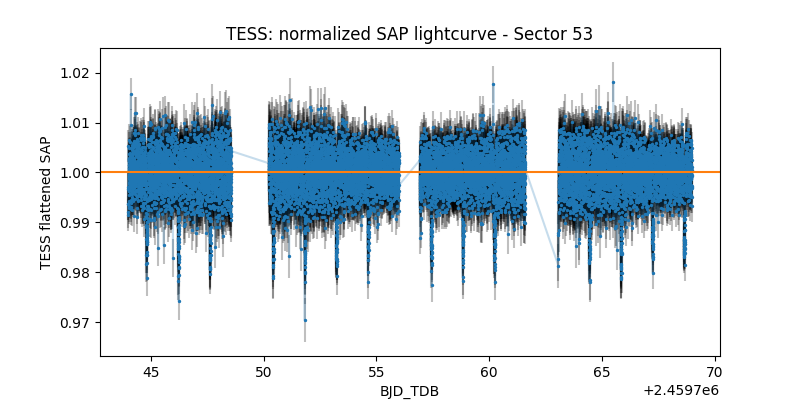

In [9]:
plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP lightcurve - Sector 80')
plt.scatter(time_80, sap_flatten_flux_80, c='C0', s=2)
plt.errorbar(time_80, sap_flatten_flux_80, yerr=sap_flux_error_80/sap_flatten_model_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.axhline(1, c='C1')
plt.xlabel('BJD_TDB')
plt.ylabel('TESS flattened SAP')
plt.show()

plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP lightcurve - Sector 79')
plt.scatter(time_79, sap_flatten_flux_79, c='C0', s=2)
plt.errorbar(time_79, sap_flatten_flux_79, yerr=sap_flux_error_79/sap_flatten_model_79, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.axhline(1, c='C1')
plt.xlabel('BJD_TDB')
plt.ylabel('TESS flattened SAP')
plt.show()

plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP lightcurve - Sector 53')
plt.scatter(time_53, sap_flatten_flux_53, c='C0', s=2)
plt.errorbar(time_53, sap_flatten_flux_53, yerr=sap_flux_error_53/sap_flatten_model_53, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.axhline(1, c='C1')
plt.xlabel('BJD_TDB')
plt.ylabel('TESS flattened SAP')
plt.show()

Let's focus on the filtering algorithm's results near the transits. To better visualize the results, we can fold the transit around the central time of transits, knowing that the same signal is supposed to repeat after every orbital period. After folding the transit, we can focus on the small portion of time around it rather than display the entire orbital period.

## Sector 80

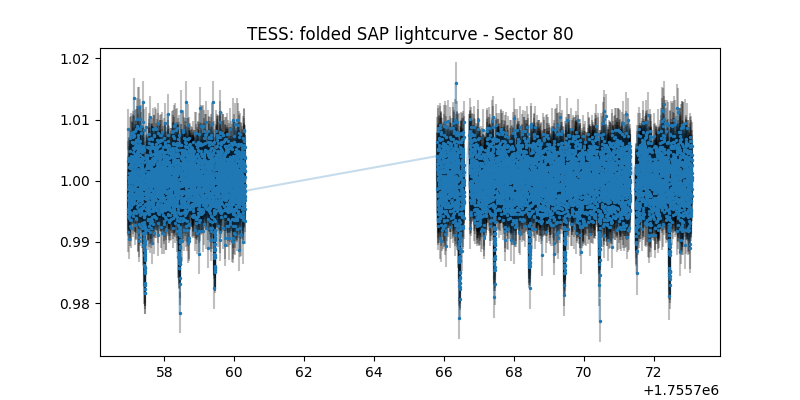

In [10]:
phase_folded_time_80 = (time_80 / period)  # <-- planetary period

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 80')
plt.scatter(phase_folded_time_80, sap_flatten_flux_80, s=2)
plt.errorbar(phase_folded_time_80, sap_flatten_flux_80, yerr=sap_flux_error_80/sap_flatten_model_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.show()

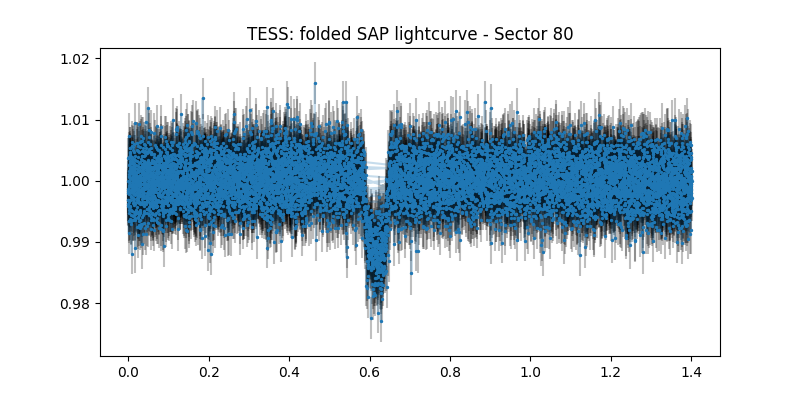

In [11]:
phase_folded_time_80 = (time_80) %period  # <-- planetary period

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 80')
plt.scatter(phase_folded_time_80, sap_flatten_flux_80, s=2)
plt.errorbar(phase_folded_time_80, sap_flatten_flux_80, yerr=sap_flux_error_80/sap_flatten_model_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.show()

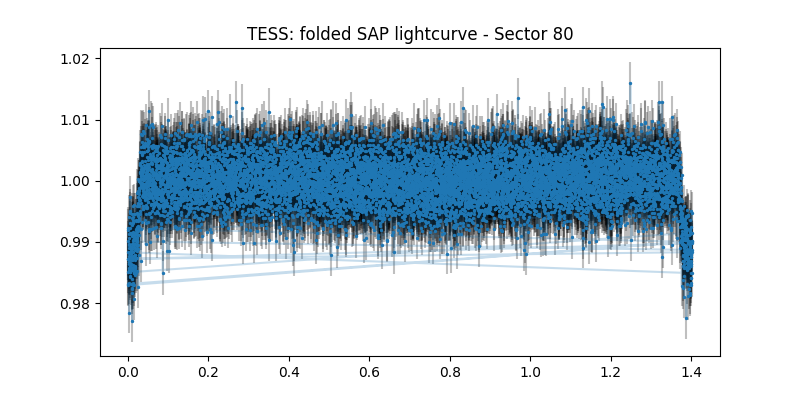

In [12]:
phase_folded_time_80 = (time_80 - transit_time) %period  # <-- planetary period

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 80')
plt.scatter(phase_folded_time_80, sap_flatten_flux_80, s=2)
plt.errorbar(phase_folded_time_80, sap_flatten_flux_80, yerr=sap_flux_error_80/sap_flatten_model_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.show()

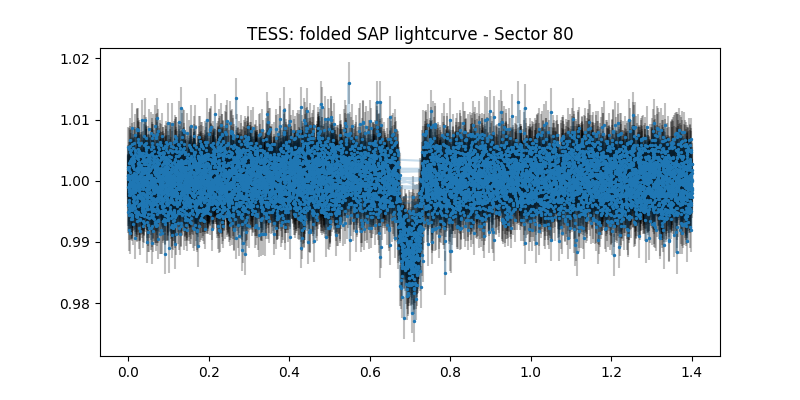

In [13]:
# Folding the lightcurves: overlapping the transits one on ech other
phase_folded_time_80 = (time_80 - transit_time - period/2) %period  # <-- planetary period

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 80')
plt.scatter(phase_folded_time_80, sap_flatten_flux_80, s=2)
plt.errorbar(phase_folded_time_80, sap_flatten_flux_80, yerr=sap_flux_error_80/sap_flatten_model_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.show()

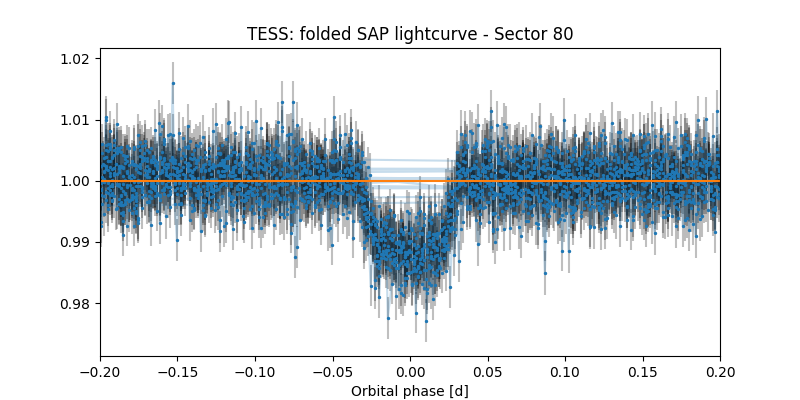

In [14]:
phase_folded_time_80 = (time_80 - transit_time - period/2) %period - period/2

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 80')
plt.scatter(phase_folded_time_80, sap_flatten_flux_80, s=2)
plt.errorbar(phase_folded_time_80, sap_flatten_flux_80, yerr=sap_flux_error_80/sap_flatten_model_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.xlim(-0.2, 0.2)
plt.axhline(1.000, c='C1')
plt.show()

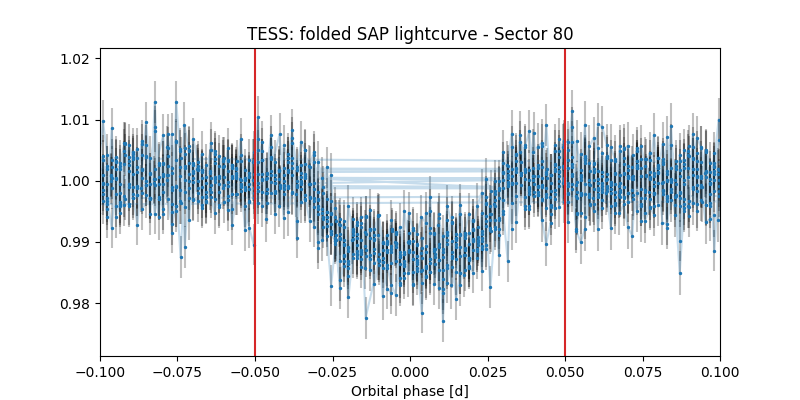

In [15]:
transit_duration = 0.1

phase_folded_time_80 = (time_80 - transit_time - period/2) %period - period/2

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 80')
plt.scatter(phase_folded_time_80, sap_flatten_flux_80, s=2)
plt.errorbar(phase_folded_time_80, sap_flatten_flux_80, yerr=sap_flux_error_80/sap_flatten_model_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.axvline(transit_duration/2, c='C3')
plt.axvline(-transit_duration/2, c='C3')

plt.xlim(-0.1, 0.1)
plt.show()

## Sector 79

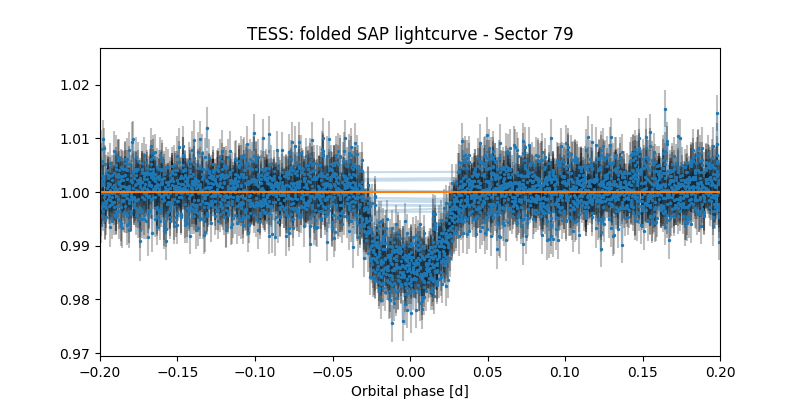

In [16]:
phase_folded_time_79 = (time_79 - transit_time - period/2) %period - period/2

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 79')
plt.scatter(phase_folded_time_79, sap_flatten_flux_79, s=2)
plt.errorbar(phase_folded_time_79, sap_flatten_flux_79, yerr=sap_flux_error_79/sap_flatten_model_79, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.xlim(-0.2, 0.2)
plt.axhline(1.000, c='C1')
plt.show()

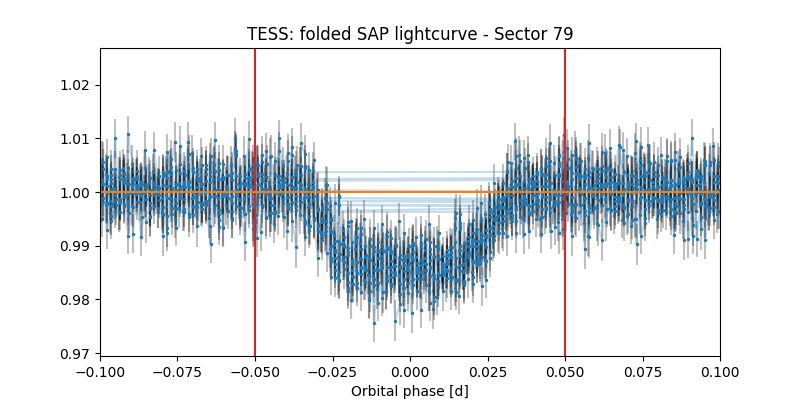

In [17]:
transit_duration = 0.1

phase_folded_time_79 = (time_79 - transit_time - period/2) %period - period/2

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 79')
plt.scatter(phase_folded_time_79, sap_flatten_flux_79, s=2)
plt.errorbar(phase_folded_time_79, sap_flatten_flux_79, yerr=sap_flux_error_79/sap_flatten_model_79, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.axvline(transit_duration/2, c='C3')
plt.axvline(-transit_duration/2, c='C3')
plt.axhline(1.000, c='C1')

plt.xlim(-0.1, 0.1)
plt.show()

## Sector 53

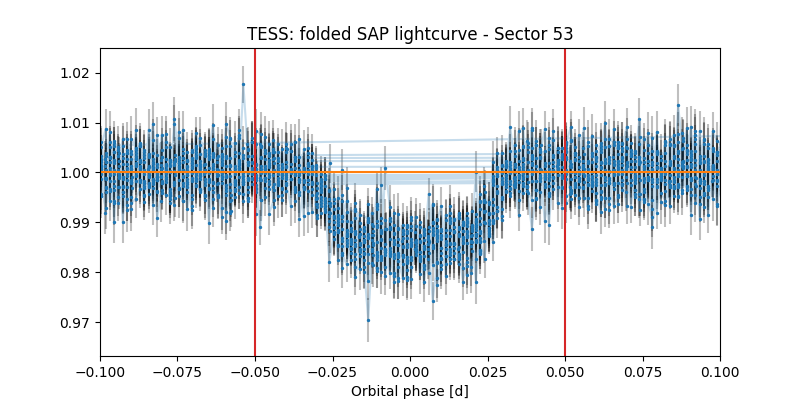

In [18]:
transit_duration = 0.1

phase_folded_time_53 = (time_53 - transit_time - period/2) %period - period/2

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 53')
plt.scatter(phase_folded_time_53, sap_flatten_flux_53, s=2)
plt.errorbar(phase_folded_time_53, sap_flatten_flux_53, yerr=sap_flux_error_53/sap_flatten_model_53, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.axvline(transit_duration/2, c='C3')
plt.axvline(-transit_duration/2, c='C3')
plt.axhline(1.000, c='C1')

plt.xlim(-0.1, 0.1)
plt.show()

We can see that the part of the light curve just before and after the transit is not centred around unity as it should be. The reason is that the filtering algorithm still includes some points belonging to the transit when computing the model, despite the best efforts to avoid this situation. To address this issue, we can compute the filtering model by excluding the points affected by the transit.

The only precaution we need to take is to increase the duration of the transit time taken from the ExoFOP archive to ensure that all transit points are excluded from the computation of the filtering model. This selection is only used for the filtering step, so excluding some out-transit points from the analysis is entirely safe. Indeed, it is better to exclude some out-transit points that include in-transit points in the filtering process.

In [19]:
from wotan import transit_mask

transit_duration = 1.7042714748865 * 2 / 24

mask_80 = transit_mask(time=time_80, period=period, duration=transit_duration, T0=transit_time)
mask_79 = transit_mask(time=time_79, period=period, duration=transit_duration, T0=transit_time)
mask_53 = transit_mask(time=time_53, period=period, duration=transit_duration, T0=transit_time)

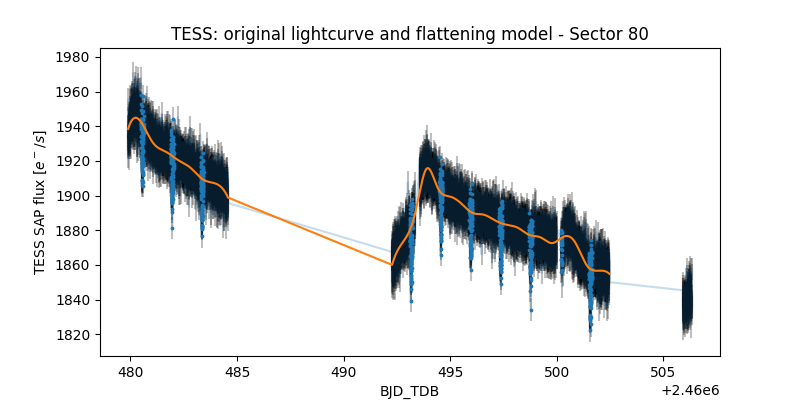

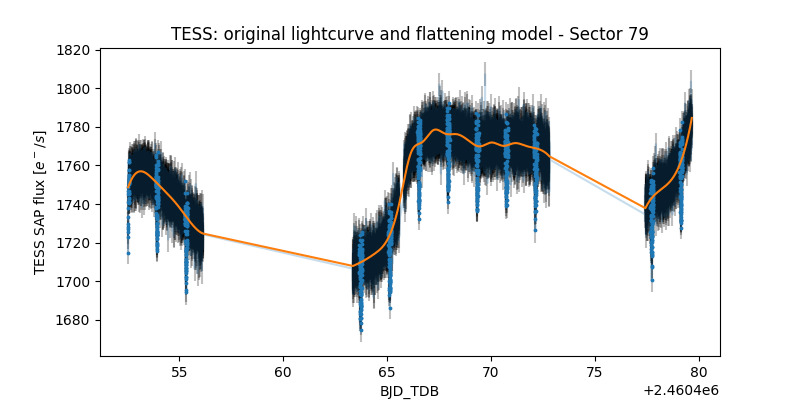

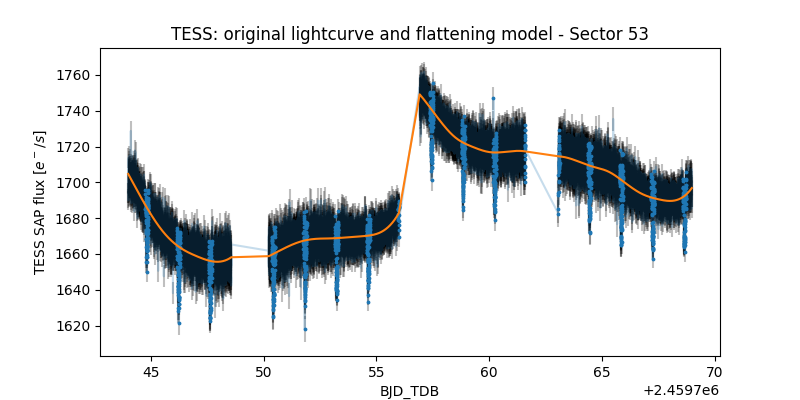

In [20]:
plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model - Sector 80')
plt.scatter(time_80[mask_80], sap_flux_80[mask_80], c='C0', s=3)                  # <-- scatter solo nella mask
plt.errorbar(time_80, sap_flux_80, yerr=sap_flux_error_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_80, sap_flatten_model_80, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.show()

print()

plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model - Sector 79')
plt.scatter(time_79[mask_79], sap_flux_79[mask_79], c='C0', s=3)                  # <-- scatter solo nella mask
plt.errorbar(time_79, sap_flux_79, yerr=sap_flux_error_79, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_79, sap_flatten_model_79, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.show()

print()

plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model - Sector 53')
plt.scatter(time_53[mask_53], sap_flux_53[mask_53], c='C0', s=3)                  # <-- scatter solo nella mask
plt.errorbar(time_53, sap_flux_53, yerr=sap_flux_error_53, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_53, sap_flatten_model_53, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.show()

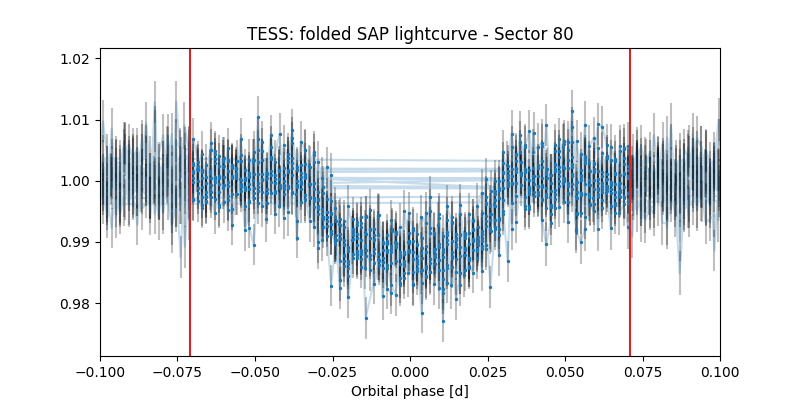

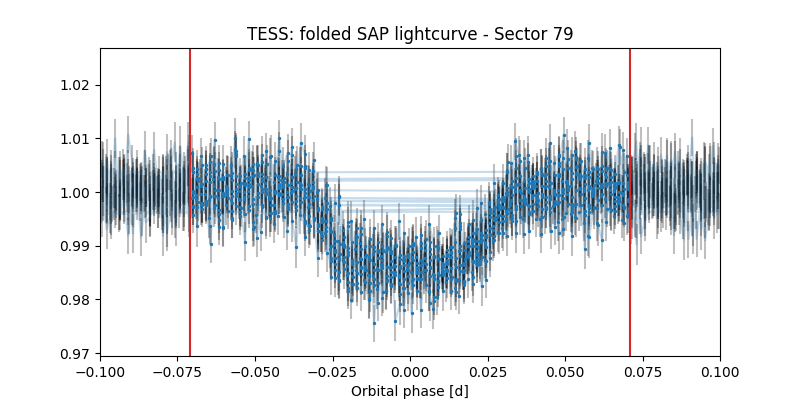

C:\Users\feder\AppData\Local\Temp\ipykernel_22904\1354997518.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,4))


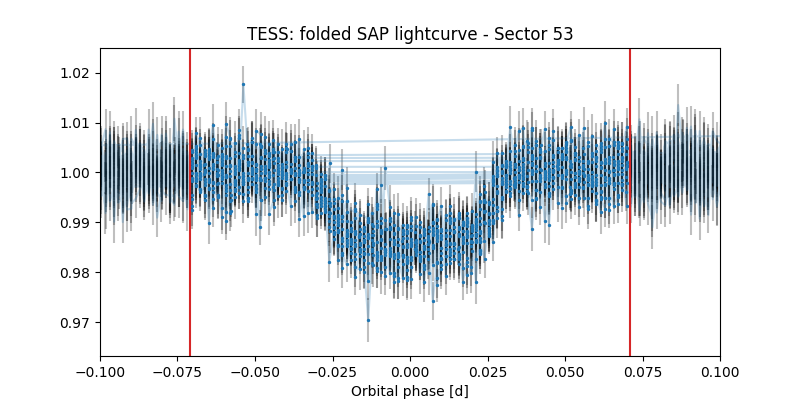

In [21]:
plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 80')
plt.scatter(phase_folded_time_80[mask_80], sap_flatten_flux_80[mask_80], s=2)
plt.errorbar(phase_folded_time_80, sap_flatten_flux_80, yerr=sap_flux_error_80/sap_flatten_model_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.axvline(transit_duration/2, c='C3')
plt.axvline(-transit_duration/2, c='C3')

plt.xlim(-0.1, 0.1)
plt.show()

print()

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 79')
plt.scatter(phase_folded_time_79[mask_79], sap_flatten_flux_79[mask_79], s=2)
plt.errorbar(phase_folded_time_79, sap_flatten_flux_79, yerr=sap_flux_error_79/sap_flatten_model_79, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.axvline(transit_duration/2, c='C3')
plt.axvline(-transit_duration/2, c='C3')

plt.xlim(-0.1, 0.1)
plt.show()

print()

plt.figure(figsize=(8,4))
plt.title('TESS: folded SAP lightcurve - Sector 53')
plt.scatter(phase_folded_time_53[mask_53], sap_flatten_flux_53[mask_53], s=2)
plt.errorbar(phase_folded_time_53, sap_flatten_flux_53, yerr=sap_flux_error_53/sap_flatten_model_53, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.xlabel('Orbital phase [d]')
plt.axvline(transit_duration/2, c='C3')
plt.axvline(-transit_duration/2, c='C3')

plt.xlim(-0.1, 0.1)
plt.show()

We can now recompute the flattening model, including the mask selection, directly as an algorithm argument.

# Selecting Flux for Sector 80

In [22]:
sap_masked_hspline_w05_flux_80, sap_masked_hspline_w05_model_80 = flatten(time_80, sap_flux_80, method='hspline',\
                                                            window_length=0.5, return_trend=True, mask=mask_80)
sap_masked_hspline_w10_flux_80, sap_masked_hspline_w10_model_80 = flatten(time_80, sap_flux_80, method='hspline',\
                                                            window_length=1., return_trend=True, mask=mask_80)
sap_masked_hspline_w15_flux_80, sap_masked_hspline_w15_model_80 = flatten(time_80, sap_flux_80, method='hspline',\
                                                            window_length=1.5, return_trend=True, mask=mask_80)

In [23]:
sap_masked_biweight_w05_flux_80, sap_masked_biweight_w05_model_80 = flatten(time_80, sap_flux_80, method='biweight',\
                                                            window_length=0.5, return_trend=True, mask=mask_80)
sap_masked_biweight_w10_flux_80, sap_masked_biweight_w10_model_80 = flatten(time_80, sap_flux_80, method='biweight',\
                                                            window_length=1., return_trend=True, mask=mask_80)
sap_masked_biweight_w15_flux_80, sap_masked_biweight_w15_model_80 = flatten(time_80, sap_flux_80, method='biweight',\
                                                            window_length=1.5, return_trend=True, mask=mask_80)

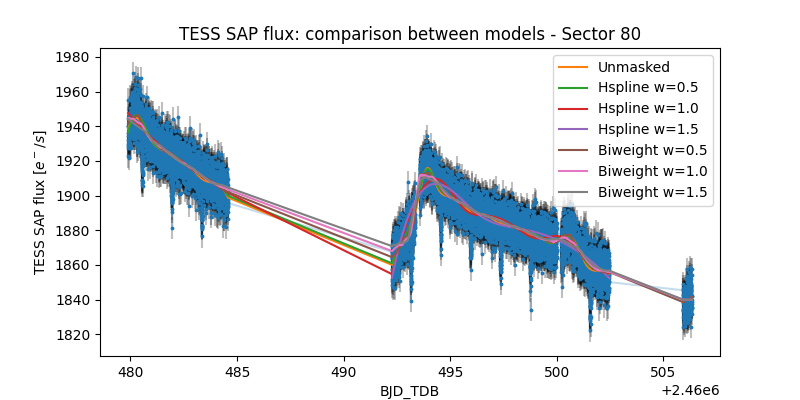

In [24]:
plt.figure(figsize=(8,4))
plt.title('TESS SAP flux: comparison between models - Sector 80')
plt.scatter(time_80, sap_flux_80, c='C0', s=3)
plt.errorbar(time_80, sap_flux_80, yerr=sap_flux_error_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_80, sap_flatten_model_80, c='C1', zorder=10, label='Unmasked')
plt.plot(time_80, sap_masked_hspline_w05_model_80, c='C2', zorder=10, label='Hspline w=0.5')
plt.plot(time_80, sap_masked_hspline_w10_model_80, c='C3', zorder=10, label='Hspline w=1.0')
plt.plot(time_80, sap_masked_hspline_w15_model_80, c='C4', zorder=10, label='Hspline w=1.5')
plt.plot(time_80, sap_masked_biweight_w05_model_80, c='C5', zorder=10, label='Biweight w=0.5')
plt.plot(time_80, sap_masked_biweight_w10_model_80, c='C6', zorder=10, label='Biweight w=1.0')
plt.plot(time_80, sap_masked_biweight_w15_model_80, c='C7', zorder=10, label='Biweight w=1.5')

plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.legend()
plt.show()

In [25]:
pdcsap_masked_hspline_w05_flux_80, pdcsap_masked_hspline_w05_model_80 = flatten(time_80, pdcsap_flux_80, method='hspline',\
                                                            window_length=0.5, return_trend=True, mask=mask_80)
pdcsap_masked_hspline_w10_flux_80, pdcsap_masked_hspline_w10_model_80 = flatten(time_80, pdcsap_flux_80, method='hspline',\
                                                            window_length=1., return_trend=True, mask=mask_80)
pdcsap_masked_hspline_w15_flux_80, pdcsap_masked_hspline_w15_model_80 = flatten(time_80, pdcsap_flux_80, method='hspline',\
                                                            window_length=1.5, return_trend=True, mask=mask_80)

In [26]:
pdcsap_masked_biweight_w05_flux_80, pdcsap_masked_biweight_w05_model_80 = flatten(time_80, pdcsap_flux_80, method='biweight',\
                                                            window_length=0.5, return_trend=True, mask=mask_80)
pdcsap_masked_biweight_w10_flux_80, pdcsap_masked_biweight_w10_model_80 = flatten(time_80, pdcsap_flux_80, method='biweight',\
                                                            window_length=1., return_trend=True, mask=mask_80)
pdcsap_masked_biweight_w15_flux_80, pdcsap_masked_biweight_w15_model_80 = flatten(time_80, pdcsap_flux_80, method='biweight',\
                                                            window_length=1.5, return_trend=True, mask=mask_80)

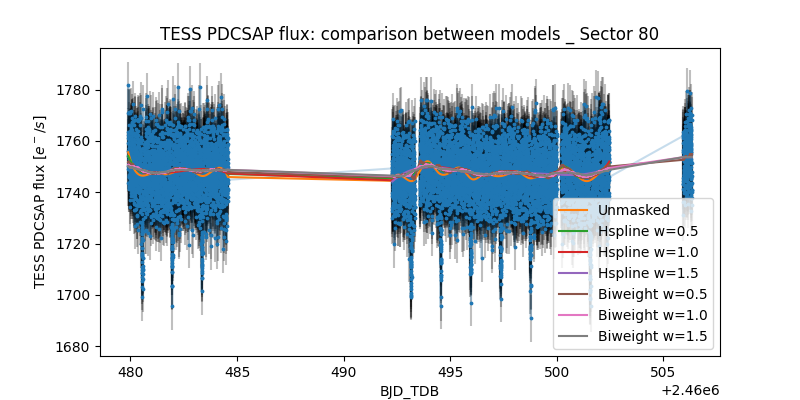

In [27]:
pdcsap_flatten_flux_80, pdcsap_flatten_model_80 = flatten(time_80, pdcsap_flux_80, method='hspline', \
                                              window_length=0.5, break_tolerance=0.5, return_trend= True) 

plt.figure(figsize=(8,4))
plt.title('TESS PDCSAP flux: comparison between models _ Sector 80')
plt.scatter(time_80, pdcsap_flux_80, c='C0', s=3)
plt.errorbar(time_80, pdcsap_flux_80, yerr=pdcsap_flux_error_80, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_80, pdcsap_flatten_model_80, c='C1', zorder=10, label='Unmasked')
plt.plot(time_80, pdcsap_masked_hspline_w05_model_80, c='C2', zorder=10, label='Hspline w=0.5')
plt.plot(time_80, pdcsap_masked_hspline_w10_model_80, c='C3', zorder=10, label='Hspline w=1.0')
plt.plot(time_80, pdcsap_masked_hspline_w15_model_80, c='C4', zorder=10, label='Hspline w=1.5')
plt.plot(time_80, pdcsap_masked_biweight_w05_model_80, c='C5', zorder=10, label='Biweight w=0.5')
plt.plot(time_80, pdcsap_masked_biweight_w10_model_80, c='C6', zorder=10, label='Biweight w=1.0')
plt.plot(time_80, pdcsap_masked_biweight_w15_model_80, c='C7', zorder=10, label='Biweight w=1.5')

plt.xlabel('BJD_TDB')
plt.ylabel('TESS PDCSAP flux [$e^-/s$]')
plt.legend()
plt.show()

### SAP flux STDs 

In [28]:
# How to compare different way to perform flattening
print('STD hspline w=0.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w05_flux_80[~mask_80]))))  # <-- np.isfinite per togliere i nan
print('STD hspline w=1.0 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w10_flux_80[~mask_80]))))
print('STD hspline w=1.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w15_flux_80[~mask_80]))))

print('STD biweight w=0.5 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w05_flux_80[~mask_80]))))         # <-- biweight mehthod
print('STD biweight w=1.0 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w10_flux_80[~mask_80])))) 
print('STD biweight w=1.5 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w15_flux_80[~mask_80])))) 

print('Average error flattened flux, hspl, w=0.5 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_80[~mask_80] / sap_masked_hspline_w05_model_80[~mask_80]))))
print('Average error flattened flux, hspl, w=1.0 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_80[~mask_80] / sap_masked_hspline_w10_model_80[~mask_80]))))
print('Average error flattened flux, hspl, w=1.5 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_80[~mask_80] / sap_masked_hspline_w15_model_80[~mask_80]))))
print('Average error flattened flux, biw, w=0.5 : {0:.6f}'.format(np.average(sap_flux_error_80[~mask_80] / sap_masked_biweight_w05_model_80[~mask_80])))
print('Average error flattened flux, biw, w=1.0 : {0:.6f}'.format(np.average(sap_flux_error_80[~mask_80] / sap_masked_biweight_w10_model_80[~mask_80])))
print('Average error flattened flux, biw, w=1.5 : {0:.6f}'.format(np.average(sap_flux_error_80[~mask_80] / sap_masked_biweight_w15_model_80[~mask_80])))


STD hspline w=0.5 with mask  : 0.171599
STD hspline w=1.0 with mask  : 0.171599
STD hspline w=1.5 with mask  : 0.475277
STD biweight w=0.5 with mask  : 0.003548
STD biweight w=1.0 with mask  : 0.003619
STD biweight w=1.5 with mask  : 0.003713
Average error flattened flux, hspl, w=0.5 : 0.969632
Average error flattened flux, hspl, w=1.0 : 0.969632
Average error flattened flux, hspl, w=1.5 : 0.655279
Average error flattened flux, biw, w=0.5 : 0.003494
Average error flattened flux, biw, w=1.0 : 0.003494
Average error flattened flux, biw, w=1.5 : 0.003494


### PDCSAP flux STDs 

In [29]:
print('STD hspline w=0.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w05_flux_80[~mask_80]))))  # <-- np.isfinite per togliere i nan
print('STD hspline w=1.0 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w10_flux_80[~mask_80]))))
print('STD hspline w=1.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w15_flux_80[~mask_80]))))

print('STD biweight w=0.5 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w05_flux_80[~mask_80]))))         # <-- biweight mehthod
print('STD biweight w=1.0 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w10_flux_80[~mask_80])))) 
print('STD biweight w=1.5 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w15_flux_80[~mask_80])))) 

print('Average error flattened flux, hspl, w=0.5 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_80[~mask_80] / pdcsap_masked_hspline_w05_model_80[~mask_80]))))
print('Average error flattened flux, hspl, w=1.0 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_80[~mask_80] / pdcsap_masked_hspline_w10_model_80[~mask_80]))))
print('Average error flattened flux, hspl, w=1.5 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_80[~mask_80] / pdcsap_masked_hspline_w15_model_80[~mask_80]))))
print('Average error flattened flux, biw, w=0.5 : {0:.6f}'.format(np.average(pdcsap_flux_error_80[~mask_80] / pdcsap_masked_biweight_w05_model_80[~mask_80])))
print('Average error flattened flux, biw, w=1.0 : {0:.6f}'.format(np.average(pdcsap_flux_error_80[~mask_80] / pdcsap_masked_biweight_w10_model_80[~mask_80])))
print('Average error flattened flux, biw, w=1.5 : {0:.6f}'.format(np.average(pdcsap_flux_error_80[~mask_80] / pdcsap_masked_biweight_w15_model_80[~mask_80])))


STD hspline w=0.5 with mask  : 0.171599
STD hspline w=1.0 with mask  : 0.171599
STD hspline w=1.5 with mask  : 0.475277
STD biweight w=0.5 with mask  : 0.005091
STD biweight w=1.0 with mask  : 0.005102
STD biweight w=1.5 with mask  : 0.005113
Average error flattened flux, hspl, w=0.5 : 0.969632
Average error flattened flux, hspl, w=1.0 : 0.969632
Average error flattened flux, hspl, w=1.5 : 0.655279
Average error flattened flux, biw, w=0.5 : 0.005318
Average error flattened flux, biw, w=1.0 : 0.005318
Average error flattened flux, biw, w=1.5 : 0.005318


In [30]:
#flatten_sector80_dictionary = {
#    'time': time,
#    'flatten_flux': sap_masked_flatten_flux,
#    'flatten_flux_error': sap_flux_error / sap_masked_flatten_model
#}

# OPPURE: ???

flatten_sector80_dictionary = {
    'time': time_80,
    'selected_flux': sap_masked_biweight_w05_flux_80,
    'selected_flux_error': sap_masked_biweight_w05_flux_80/sap_masked_biweight_w05_model_80,
    
    'sap_masked_hspline_w05_flux': sap_masked_hspline_w05_flux_80,
    'sap_masked_hspline_w05_flux_error': sap_flux_error_80/sap_masked_hspline_w05_model_80,
    'sap_masked_hspline_w10_flux': sap_masked_hspline_w10_flux_80,
    'sap_masked_hspline_w10_flux_error': sap_flux_error_80/sap_masked_hspline_w10_model_80,
    'sap_masked_hspline_w15_flux': sap_masked_hspline_w15_flux_80,
    'sap_masked_hspline_w15_flux_error': sap_flux_error_80/sap_masked_hspline_w15_model_80,
    'sap_masked_biweight_w05_flux': sap_masked_biweight_w05_flux_80,
    'sap_masked_biweight_w05_flux_error': sap_flux_error_80/sap_masked_biweight_w05_model_80,
    'sap_masked_biweight_w10_flux': sap_masked_biweight_w10_flux_80,
    'sap_masked_biweight_w10_flux_error': sap_flux_error_80/sap_masked_biweight_w10_model_80,
    'sap_masked_biweight_w15_flux': sap_masked_biweight_w15_flux_80,
    'sap_masked_biweight_w15_flux_error': sap_flux_error_80/sap_masked_biweight_w15_model_80,
    
    'pdcsap_masked_hspline_w05_flux': pdcsap_masked_hspline_w05_flux_80,
    'pdcsap_masked_hspline_w05_flux_error': pdcsap_flux_error_80/pdcsap_masked_hspline_w05_model_80,
    'pdcsap_masked_hspline_w10_flux': pdcsap_masked_hspline_w10_flux_80,
    'pdcsap_masked_hspline_w10_flux_error': pdcsap_flux_error_80/pdcsap_masked_hspline_w10_model_80,
    'pdcsap_masked_hspline_w15_flux': pdcsap_masked_hspline_w15_flux_80,
    'pdcsap_masked_hspline_w15_flux_error': pdcsap_flux_error_80/pdcsap_masked_hspline_w15_model_80,
    'pdcsap_masked_biweight_w05_flux': pdcsap_masked_biweight_w05_flux_80,
    'pdcsap_masked_biweight_w05_flux_error': pdcsap_flux_error_80/pdcsap_masked_biweight_w05_model_80,
    'pdcsap_masked_biweight_w10_flux': pdcsap_masked_biweight_w10_flux_80,
    'pdcsap_masked_biweight_w10_flux_error': pdcsap_flux_error_80/pdcsap_masked_biweight_w10_model_80,
    'pdcsap_masked_biweight_w15_flux': pdcsap_masked_biweight_w15_flux_80,
    'pdcsap_masked_biweight_w15_flux_error': pdcsap_flux_error_80/pdcsap_masked_biweight_w15_model_80,
}


In [31]:
pickle.dump(flatten_sector80_dictionary, open('flatten_sector80_dictionary.p', 'wb'))

# Selecting Flux for Sector 79

In [32]:
sap_masked_hspline_w05_flux_79, sap_masked_hspline_w05_model_79 = flatten(time_79, sap_flux_79, method='hspline',\
                                                            window_length=0.5, return_trend=True, mask=mask_79)
sap_masked_hspline_w10_flux_79, sap_masked_hspline_w10_model_79 = flatten(time_79, sap_flux_79, method='hspline',\
                                                            window_length=1., return_trend=True, mask=mask_79)
sap_masked_hspline_w15_flux_79, sap_masked_hspline_w15_model_79 = flatten(time_79, sap_flux_79, method='hspline',\
                                                            window_length=1.5, return_trend=True, mask=mask_79)

In [33]:
sap_masked_biweight_w05_flux_79, sap_masked_biweight_w05_model_79 = flatten(time_79, sap_flux_79, method='biweight',\
                                                            window_length=0.5, return_trend=True, mask=mask_79)
sap_masked_biweight_w10_flux_79, sap_masked_biweight_w10_model_79 = flatten(time_79, sap_flux_79, method='biweight',\
                                                            window_length=1., return_trend=True, mask=mask_79)
sap_masked_biweight_w15_flux_79, sap_masked_biweight_w15_model_79 = flatten(time_79, sap_flux_79, method='biweight',\
                                                            window_length=1.5, return_trend=True, mask=mask_79)

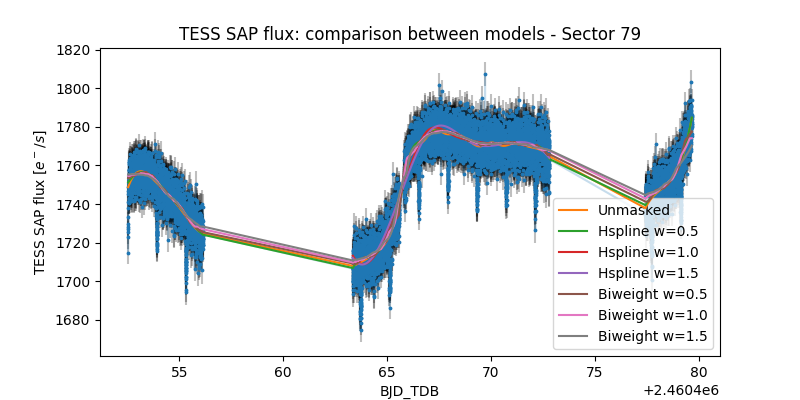

In [35]:
plt.figure(figsize=(8,4))
plt.title('TESS SAP flux: comparison between models - Sector 79')
plt.scatter(time_79, sap_flux_79, c='C0', s=3)
plt.errorbar(time_79, sap_flux_79, yerr=sap_flux_error_79, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_79, sap_flatten_model_79, c='C1', zorder=10, label='Unmasked')
plt.plot(time_79, sap_masked_hspline_w05_model_79, c='C2', zorder=10, label='Hspline w=0.5')
plt.plot(time_79, sap_masked_hspline_w10_model_79, c='C3', zorder=10, label='Hspline w=1.0')
plt.plot(time_79, sap_masked_hspline_w15_model_79, c='C4', zorder=10, label='Hspline w=1.5')
plt.plot(time_79, sap_masked_biweight_w05_model_79, c='C5', zorder=10, label='Biweight w=0.5')
plt.plot(time_79, sap_masked_biweight_w10_model_79, c='C6', zorder=10, label='Biweight w=1.0')
plt.plot(time_79, sap_masked_biweight_w15_model_79, c='C7', zorder=10, label='Biweight w=1.5')

plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.legend()
plt.show()

In [36]:
pdcsap_masked_hspline_w05_flux_79, pdcsap_masked_hspline_w05_model_79 = flatten(time_79, pdcsap_flux_79, method='hspline',\
                                                            window_length=0.5, return_trend=True, mask=mask_79)
pdcsap_masked_hspline_w10_flux_79, pdcsap_masked_hspline_w10_model_79 = flatten(time_79, pdcsap_flux_79, method='hspline',\
                                                            window_length=1., return_trend=True, mask=mask_79)
pdcsap_masked_hspline_w15_flux_79, pdcsap_masked_hspline_w15_model_79 = flatten(time_79, pdcsap_flux_79, method='hspline',\
                                                            window_length=1.5, return_trend=True, mask=mask_79)

In [37]:
pdcsap_masked_biweight_w05_flux_79, pdcsap_masked_biweight_w05_model_79 = flatten(time_79, pdcsap_flux_79, method='biweight',\
                                                            window_length=0.5, return_trend=True, mask=mask_79)
pdcsap_masked_biweight_w10_flux_79, pdcsap_masked_biweight_w10_model_79 = flatten(time_79, pdcsap_flux_79, method='biweight',\
                                                            window_length=1., return_trend=True, mask=mask_79)
pdcsap_masked_biweight_w15_flux_79, pdcsap_masked_biweight_w15_model_79 = flatten(time_79, pdcsap_flux_79, method='biweight',\
                                                            window_length=1.5, return_trend=True, mask=mask_79)

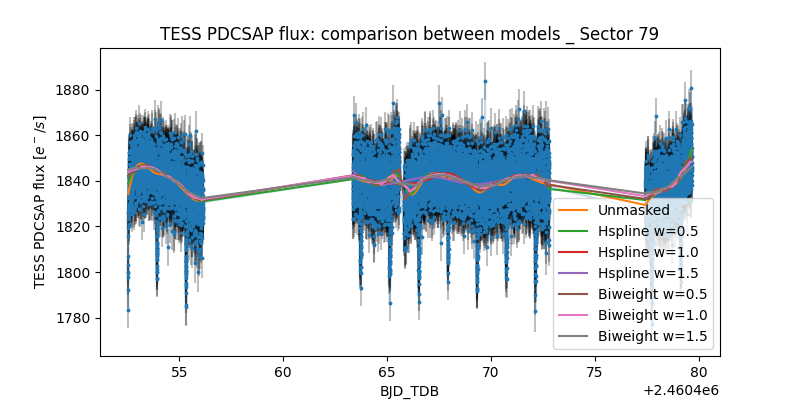

In [38]:
pdcsap_flatten_flux_79, pdcsap_flatten_model_79 = flatten(time_79, pdcsap_flux_79, method='hspline', \
                                              window_length=0.5, break_tolerance=0.5, return_trend= True) 

plt.figure(figsize=(8,4))
plt.title('TESS PDCSAP flux: comparison between models _ Sector 79')
plt.scatter(time_79, pdcsap_flux_79, c='C0', s=3)
plt.errorbar(time_79, pdcsap_flux_79, yerr=pdcsap_flux_error_79, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_79, pdcsap_flatten_model_79, c='C1', zorder=10, label='Unmasked')
plt.plot(time_79, pdcsap_masked_hspline_w05_model_79, c='C2', zorder=10, label='Hspline w=0.5')
plt.plot(time_79, pdcsap_masked_hspline_w10_model_79, c='C3', zorder=10, label='Hspline w=1.0')
plt.plot(time_79, pdcsap_masked_hspline_w15_model_79, c='C4', zorder=10, label='Hspline w=1.5')
plt.plot(time_79, pdcsap_masked_biweight_w05_model_79, c='C5', zorder=10, label='Biweight w=0.5')
plt.plot(time_79, pdcsap_masked_biweight_w10_model_79, c='C6', zorder=10, label='Biweight w=1.0')
plt.plot(time_79, pdcsap_masked_biweight_w15_model_79, c='C7', zorder=10, label='Biweight w=1.5')

plt.xlabel('BJD_TDB')
plt.ylabel('TESS PDCSAP flux [$e^-/s$]')
plt.legend()
plt.show()

### SAP flux STDs 

In [39]:
# How to compare different way to perform flattening
print('STD hspline w=0.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w05_flux_79[~mask_79]))))  # <-- np.isfinite per togliere i nan
print('STD hspline w=1.0 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w10_flux_79[~mask_79]))))
print('STD hspline w=1.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w15_flux_79[~mask_79]))))

print('STD biweight w=0.5 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w05_flux_79[~mask_79]))))         # <-- biweight mehthod
print('STD biweight w=1.0 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w10_flux_79[~mask_79])))) 
print('STD biweight w=1.5 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w15_flux_79[~mask_79])))) 

print('Average error flattened flux, hspl, w=0.5 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_79[~mask_79] / sap_masked_hspline_w05_model_79[~mask_79]))))
print('Average error flattened flux, hspl, w=1.0 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_79[~mask_79] / sap_masked_hspline_w10_model_79[~mask_79]))))
print('Average error flattened flux, hspl, w=1.5 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_79[~mask_79] / sap_masked_hspline_w15_model_79[~mask_79]))))
print('Average error flattened flux, biw, w=0.5 : {0:.6f}'.format(np.average(sap_flux_error_79[~mask_79] / sap_masked_biweight_w05_model_79[~mask_79])))
print('Average error flattened flux, biw, w=1.0 : {0:.6f}'.format(np.average(sap_flux_error_79[~mask_79] / sap_masked_biweight_w10_model_79[~mask_79])))
print('Average error flattened flux, biw, w=1.5 : {0:.6f}'.format(np.average(sap_flux_error_79[~mask_79] / sap_masked_biweight_w15_model_79[~mask_79])))


STD hspline w=0.5 with mask  : 0.000000
STD hspline w=1.0 with mask  : 0.487152
STD hspline w=1.5 with mask  : 0.487152
STD biweight w=0.5 with mask  : 0.003687
STD biweight w=1.0 with mask  : 0.003724
STD biweight w=1.5 with mask  : 0.003834
Average error flattened flux, hspl, w=0.5 : 1.000000
Average error flattened flux, hspl, w=1.0 : 0.612617
Average error flattened flux, hspl, w=1.5 : 0.612617
Average error flattened flux, biw, w=0.5 : 0.003524
Average error flattened flux, biw, w=1.0 : 0.003524
Average error flattened flux, biw, w=1.5 : 0.003524


### PDCSAP flux STDs 

In [40]:
print('STD hspline w=0.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w05_flux_79[~mask_79]))))  # <-- np.isfinite per togliere i nan
print('STD hspline w=1.0 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w10_flux_79[~mask_79]))))
print('STD hspline w=1.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w15_flux_79[~mask_79]))))

print('STD biweight w=0.5 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w05_flux_79[~mask_79]))))         # <-- biweight mehthod
print('STD biweight w=1.0 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w10_flux_79[~mask_79])))) 
print('STD biweight w=1.5 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w15_flux_79[~mask_79])))) 

print('Average error flattened flux, hspl, w=0.5 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_79[~mask_79] / pdcsap_masked_hspline_w05_model_79[~mask_79]))))
print('Average error flattened flux, hspl, w=1.0 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_79[~mask_79] / pdcsap_masked_hspline_w10_model_79[~mask_79]))))
print('Average error flattened flux, hspl, w=1.5 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_79[~mask_79] / pdcsap_masked_hspline_w15_model_79[~mask_79]))))
print('Average error flattened flux, biw, w=0.5 : {0:.6f}'.format(np.average(pdcsap_flux_error_79[~mask_79] / pdcsap_masked_biweight_w05_model_79[~mask_79])))
print('Average error flattened flux, biw, w=1.0 : {0:.6f}'.format(np.average(pdcsap_flux_error_79[~mask_79] / pdcsap_masked_biweight_w10_model_79[~mask_79])))
print('Average error flattened flux, biw, w=1.5 : {0:.6f}'.format(np.average(pdcsap_flux_error_79[~mask_79] / pdcsap_masked_biweight_w15_model_79[~mask_79])))


STD hspline w=0.5 with mask  : 0.000000
STD hspline w=1.0 with mask  : 0.487152
STD hspline w=1.5 with mask  : 0.487152
STD biweight w=0.5 with mask  : 0.004542
STD biweight w=1.0 with mask  : 0.004600
STD biweight w=1.5 with mask  : 0.004648
Average error flattened flux, hspl, w=0.5 : 1.000000
Average error flattened flux, hspl, w=1.0 : 0.612617
Average error flattened flux, hspl, w=1.5 : 0.612617
Average error flattened flux, biw, w=0.5 : 0.004442
Average error flattened flux, biw, w=1.0 : 0.004442
Average error flattened flux, biw, w=1.5 : 0.004442


In [54]:
flatten_sector79_dictionary = {
    'time': time_79,
    'selected_flux': sap_masked_biweight_w05_flux_79,
    'selected_flux_error': sap_masked_biweight_w05_flux_79/sap_masked_biweight_w05_model_79,
}
    
pickle.dump(flatten_sector79_dictionary, open('flatten_sector79_dictionary.p', 'wb'))

# Selecting Flux for Sector 53


In [44]:
sap_masked_hspline_w05_flux_53, sap_masked_hspline_w05_model_53 = flatten(time_53, sap_flux_53, method='hspline',\
                                                            window_length=0.5, return_trend=True, mask=mask_53)
sap_masked_hspline_w10_flux_53, sap_masked_hspline_w10_model_53 = flatten(time_53, sap_flux_53, method='hspline',\
                                                            window_length=1., return_trend=True, mask=mask_53)
sap_masked_hspline_w15_flux_53, sap_masked_hspline_w15_model_53 = flatten(time_53, sap_flux_53, method='hspline',\
                                                            window_length=1.5, return_trend=True, mask=mask_53)

In [45]:
sap_masked_biweight_w05_flux_53, sap_masked_biweight_w05_model_53 = flatten(time_53, sap_flux_53, method='biweight',\
                                                            window_length=0.5, return_trend=True, mask=mask_53)
sap_masked_biweight_w10_flux_53, sap_masked_biweight_w10_model_53 = flatten(time_53, sap_flux_53, method='biweight',\
                                                            window_length=1., return_trend=True, mask=mask_53)
sap_masked_biweight_w15_flux_53, sap_masked_biweight_w15_model_53 = flatten(time_53, sap_flux_53, method='biweight',\
                                                            window_length=1.5, return_trend=True, mask=mask_53)

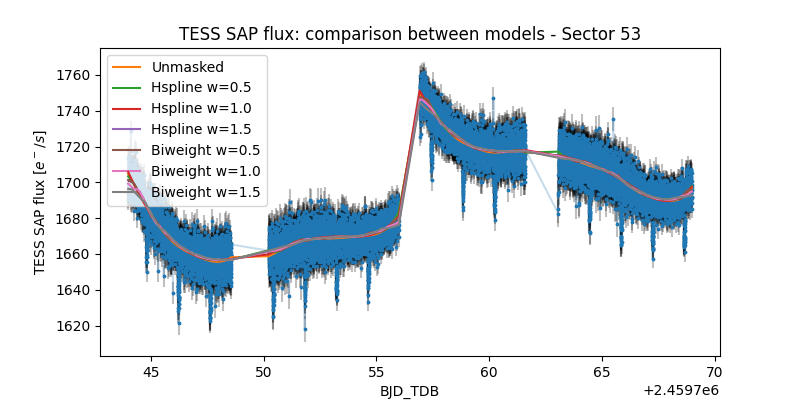

In [46]:
plt.figure(figsize=(8,4))
plt.title('TESS SAP flux: comparison between models - Sector 53')
plt.scatter(time_53, sap_flux_53, c='C0', s=3)
plt.errorbar(time_53, sap_flux_53, yerr=sap_flux_error_53, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_53, sap_flatten_model_53, c='C1', zorder=10, label='Unmasked')
plt.plot(time_53, sap_masked_hspline_w05_model_53, c='C2', zorder=10, label='Hspline w=0.5')
plt.plot(time_53, sap_masked_hspline_w10_model_53, c='C3', zorder=10, label='Hspline w=1.0')
plt.plot(time_53, sap_masked_hspline_w15_model_53, c='C4', zorder=10, label='Hspline w=1.5')
plt.plot(time_53, sap_masked_biweight_w05_model_53, c='C5', zorder=10, label='Biweight w=0.5')
plt.plot(time_53, sap_masked_biweight_w10_model_53, c='C6', zorder=10, label='Biweight w=1.0')
plt.plot(time_53, sap_masked_biweight_w15_model_53, c='C7', zorder=10, label='Biweight w=1.5')

plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [$e^-/s$]')
plt.legend()
plt.show()

In [47]:
pdcsap_masked_hspline_w05_flux_53, pdcsap_masked_hspline_w05_model_53 = flatten(time_53, pdcsap_flux_53, method='hspline',\
                                                            window_length=0.5, return_trend=True, mask=mask_53)
pdcsap_masked_hspline_w10_flux_53, pdcsap_masked_hspline_w10_model_53 = flatten(time_53, pdcsap_flux_53, method='hspline',\
                                                            window_length=1., return_trend=True, mask=mask_53)
pdcsap_masked_hspline_w15_flux_53, pdcsap_masked_hspline_w15_model_53 = flatten(time_53, pdcsap_flux_53, method='hspline',\
                                                            window_length=1.5, return_trend=True, mask=mask_53)

In [48]:
pdcsap_masked_biweight_w05_flux_53, pdcsap_masked_biweight_w05_model_53 = flatten(time_53, pdcsap_flux_53, method='biweight',\
                                                            window_length=0.5, return_trend=True, mask=mask_53)
pdcsap_masked_biweight_w10_flux_53, pdcsap_masked_biweight_w10_model_53 = flatten(time_53, pdcsap_flux_53, method='biweight',\
                                                            window_length=1., return_trend=True, mask=mask_53)
pdcsap_masked_biweight_w15_flux_53, pdcsap_masked_biweight_w15_model_53 = flatten(time_53, pdcsap_flux_53, method='biweight',\
                                                            window_length=1.5, return_trend=True, mask=mask_53)

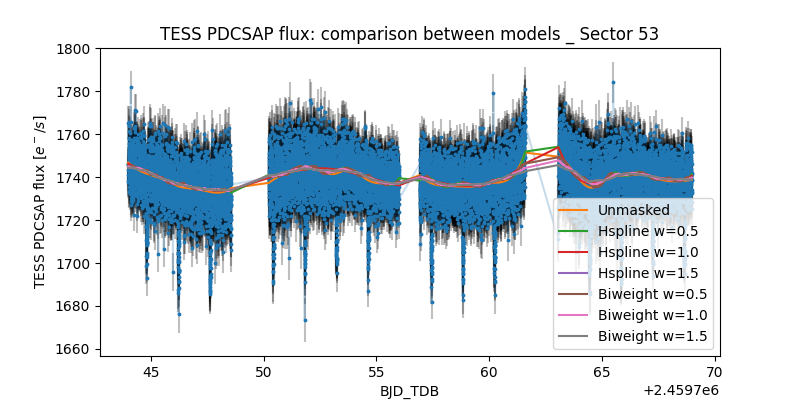

In [50]:
pdcsap_flatten_flux_53, pdcsap_flatten_model_53 = flatten(time_53, pdcsap_flux_53, method='hspline', \
                                              window_length=0.6, break_tolerance=0.5, return_trend= True) 

plt.figure(figsize=(8,4))
plt.title('TESS PDCSAP flux: comparison between models _ Sector 53')
plt.scatter(time_53, pdcsap_flux_53, c='C0', s=3)
plt.errorbar(time_53, pdcsap_flux_53, yerr=pdcsap_flux_error_53, ecolor='k', \
             fmt='', alpha=0.25, zorder=-1)
plt.plot(time_53, pdcsap_flatten_model_53, c='C1', zorder=10, label='Unmasked')
plt.plot(time_53, pdcsap_masked_hspline_w05_model_53, c='C2', zorder=10, label='Hspline w=0.5')
plt.plot(time_53, pdcsap_masked_hspline_w10_model_53, c='C3', zorder=10, label='Hspline w=1.0')
plt.plot(time_53, pdcsap_masked_hspline_w15_model_53, c='C4', zorder=10, label='Hspline w=1.5')
plt.plot(time_53, pdcsap_masked_biweight_w05_model_53, c='C5', zorder=10, label='Biweight w=0.5')
plt.plot(time_53, pdcsap_masked_biweight_w10_model_53, c='C6', zorder=10, label='Biweight w=1.0')
plt.plot(time_53, pdcsap_masked_biweight_w15_model_53, c='C7', zorder=10, label='Biweight w=1.5')

plt.xlabel('BJD_TDB')
plt.ylabel('TESS PDCSAP flux [$e^-/s$]')
plt.legend()
plt.show()

### SAP flux STDs 

In [51]:
# How to compare different way to perform flattening
print('STD hspline w=0.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w05_flux_53[~mask_53]))))  # <-- np.isfinite per togliere i nan
print('STD hspline w=1.0 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w10_flux_53[~mask_53]))))
print('STD hspline w=1.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(sap_masked_hspline_w15_flux_53[~mask_53]))))

print('STD biweight w=0.5 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w05_flux_53[~mask_53]))))         # <-- biweight mehthod
print('STD biweight w=1.0 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w10_flux_53[~mask_53])))) 
print('STD biweight w=1.5 with mask  : {0:.6f}'.format(np.std((sap_masked_biweight_w15_flux_53[~mask_53])))) 

print('Average error flattened flux, hspl, w=0.5 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_53[~mask_53] / sap_masked_hspline_w05_model_53[~mask_53]))))
print('Average error flattened flux, hspl, w=1.0 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_53[~mask_53] / sap_masked_hspline_w10_model_53[~mask_53]))))
print('Average error flattened flux, hspl, w=1.5 : {0:.6f}'.format(np.average(np.isfinite(sap_flux_error_53[~mask_53] / sap_masked_hspline_w15_model_53[~mask_53]))))
print('Average error flattened flux, biw, w=0.5 : {0:.6f}'.format(np.average(sap_flux_error_53[~mask_53] / sap_masked_biweight_w05_model_53[~mask_53])))
print('Average error flattened flux, biw, w=1.0 : {0:.6f}'.format(np.average(sap_flux_error_53[~mask_53] / sap_masked_biweight_w10_model_53[~mask_53])))
print('Average error flattened flux, biw, w=1.5 : {0:.6f}'.format(np.average(sap_flux_error_53[~mask_53] / sap_masked_biweight_w15_model_53[~mask_53])))


STD hspline w=0.5 with mask  : 0.000000
STD hspline w=1.0 with mask  : 0.000000
STD hspline w=1.5 with mask  : 0.000000
STD biweight w=0.5 with mask  : 0.003723
STD biweight w=1.0 with mask  : 0.003752
STD biweight w=1.5 with mask  : 0.003806
Average error flattened flux, hspl, w=0.5 : 1.000000
Average error flattened flux, hspl, w=1.0 : 1.000000
Average error flattened flux, hspl, w=1.5 : 0.000000
Average error flattened flux, biw, w=0.5 : 0.003772
Average error flattened flux, biw, w=1.0 : 0.003772
Average error flattened flux, biw, w=1.5 : 0.003772


### PDCSAP flux STDs 

In [52]:
print('STD hspline w=0.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w05_flux_53[~mask_53]))))  # <-- np.isfinite per togliere i nan
print('STD hspline w=1.0 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w10_flux_53[~mask_53]))))
print('STD hspline w=1.5 with mask  : {0:.6f}'.format(np.std(np.isfinite(pdcsap_masked_hspline_w15_flux_53[~mask_53]))))

print('STD biweight w=0.5 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w05_flux_53[~mask_53]))))         # <-- biweight mehthod
print('STD biweight w=1.0 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w10_flux_53[~mask_53])))) 
print('STD biweight w=1.5 with mask  : {0:.6f}'.format(np.std((pdcsap_masked_biweight_w15_flux_53[~mask_53])))) 

print('Average error flattened flux, hspl, w=0.5 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_53[~mask_53] / pdcsap_masked_hspline_w05_model_53[~mask_53]))))
print('Average error flattened flux, hspl, w=1.0 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_53[~mask_53] / pdcsap_masked_hspline_w10_model_53[~mask_53]))))
print('Average error flattened flux, hspl, w=1.5 : {0:.6f}'.format(np.average(np.isfinite(pdcsap_flux_error_53[~mask_53] / pdcsap_masked_hspline_w15_model_53[~mask_53]))))
print('Average error flattened flux, biw, w=0.5 : {0:.6f}'.format(np.average(pdcsap_flux_error_53[~mask_53] / pdcsap_masked_biweight_w05_model_53[~mask_53])))
print('Average error flattened flux, biw, w=1.0 : {0:.6f}'.format(np.average(pdcsap_flux_error_53[~mask_53] / pdcsap_masked_biweight_w10_model_53[~mask_53])))
print('Average error flattened flux, biw, w=1.5 : {0:.6f}'.format(np.average(pdcsap_flux_error_53[~mask_53] / pdcsap_masked_biweight_w15_model_53[~mask_53])))


STD hspline w=0.5 with mask  : 0.000000
STD hspline w=1.0 with mask  : 0.000000
STD hspline w=1.5 with mask  : 0.000000
STD biweight w=0.5 with mask  : 0.005012
STD biweight w=1.0 with mask  : 0.005038
STD biweight w=1.5 with mask  : 0.005065
Average error flattened flux, hspl, w=0.5 : 1.000000
Average error flattened flux, hspl, w=1.0 : 1.000000
Average error flattened flux, hspl, w=1.5 : 0.000000
Average error flattened flux, biw, w=0.5 : 0.005075
Average error flattened flux, biw, w=1.0 : 0.005075
Average error flattened flux, biw, w=1.5 : 0.005075


In [53]:
flatten_sector53_dictionary = {
    'time': time_53,
    'selected_flux': sap_masked_biweight_w05_flux_53,
    'selected_flux_error': sap_masked_biweight_w05_flux_53/sap_masked_biweight_w05_model_53,
}
    
pickle.dump(flatten_sector53_dictionary, open('flatten_sector53_dictionary.p', 'wb'))